In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ann
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
import os
#import custom_functions as cf

Add date.

In [4]:
from datetime import date

In [5]:
today = date.today().strftime("%y%m%d")

Add my color scheme.

In [6]:
colors2 = plt.cm.RdYlBu_r(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(0.7)
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

Set parameters for plots in scanpy

In [7]:
sc.settings.set_figure_params(dpi=80)

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map='viridis', format='pdf', transparent=False,
                     ipython_format='png2x')


# Introduction

In this notebook, we visualise the data characteristics after QC. In particular, we plot the 
* number of expressed genes
* number of transcripts

separated by strain and age. 


# Read data

Set directory paths.

In [8]:
project_dir = '/storage/groups/ml01/workspace/maren.buettner/Martinez_Liver_HPC/'

In [9]:
data_dir = project_dir + 'data/'

In [10]:
sc.settings.figdir = './../figures/'

Read the normalized data from file. 

In [11]:
adata = sc.read(data_dir + 'snRNAseq_mouse_hepatocytes_all_cells_filtered_TPM_mar21.h5ad')

# Visualisation

Here, we create violin plots of the number of genes and transcripts per strain and age.

In [12]:
adata

AnnData object with n_obs × n_vars = 6605 × 30520
    obs: 'batch', 'exp.', 'libraryID', 'experiment', 'strain', 'age', 'sex', 'ploidy', 'ERCC.dilution', 'column', 'row', 'percentERCC', 'n_counts', 'age_grouped', 'n_counts_raw', 'n_counts_transcripts', 'n_counts_ERCC', 'n_genes', 'high_ERCC', 'low_ERCC', 'low_genes', 'high_genes', 'low_counts', 'high_counts', 'ERCC_size_factor', 'n_counts_TPM', 'RPK_factor', 'n_counts_TPM_norm', 'mean_transcript_count_TPM', 'cyclone_phases', 'score_G1', 'score_S', 'score_G2M'
    var: 'length', 'gene_name', 'chromosomes', 'start', 'end', 'n_counts', 'mean_exp_TPM', 'median_exp_TPM'
    uns: 'ERCC.dilution_colors', 'age_colors', 'age_grouped_colors', 'cyclone_phases_colors', 'exp._colors', 'neighbors', 'pca', 'ploidy_colors', 'strain_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'norm_counts', 'raw', 'raw_bin'
    obsp: 'connectivities', 'distances'

Add strain and age info as covariate.

In [13]:
strain_age = [adata.obs['strain'][idx] + ' ' + 
              adata.obs['age_grouped'][idx] for idx in range(adata.n_obs)]

In [14]:
adata.obs['strain_age'] = pd.Categorical(strain_age, 
                                categories=['C57Bl6/J young', 
                                            'C57Bl6/J old', 
                                            'HNF4 KO young', 
                                            'HNF4 KO old',
                                            'CEBPA KO young',
                                            'CEBPA KO old',
                                            'CTCF KO young',
                                            'CTCF KO old', 
                                           ])

Use the following color scheme:

In [28]:
adata.uns['strain_age_colors'] = []
adata.uns['strain_age_colors'].append('#686868') #WT young 
adata.uns['strain_age_colors'].append('#a9a9a9') #WT old
adata.uns['strain_age_colors'].append('#8B4C39') #HNF4 young - salmon4 color
adata.uns['strain_age_colors'].append('#BE7F6C') #HNF4 old
adata.uns['strain_age_colors'].append('#EE8262') #CEBPA young - salmon2 color
adata.uns['strain_age_colors'].append('#FFB595') #CEBPA old
adata.uns['strain_age_colors'].append('#26a2b5') #CTCF young - blueish color
adata.uns['strain_age_colors'].append('#59E5F8') #CTCF old

/home/icb/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


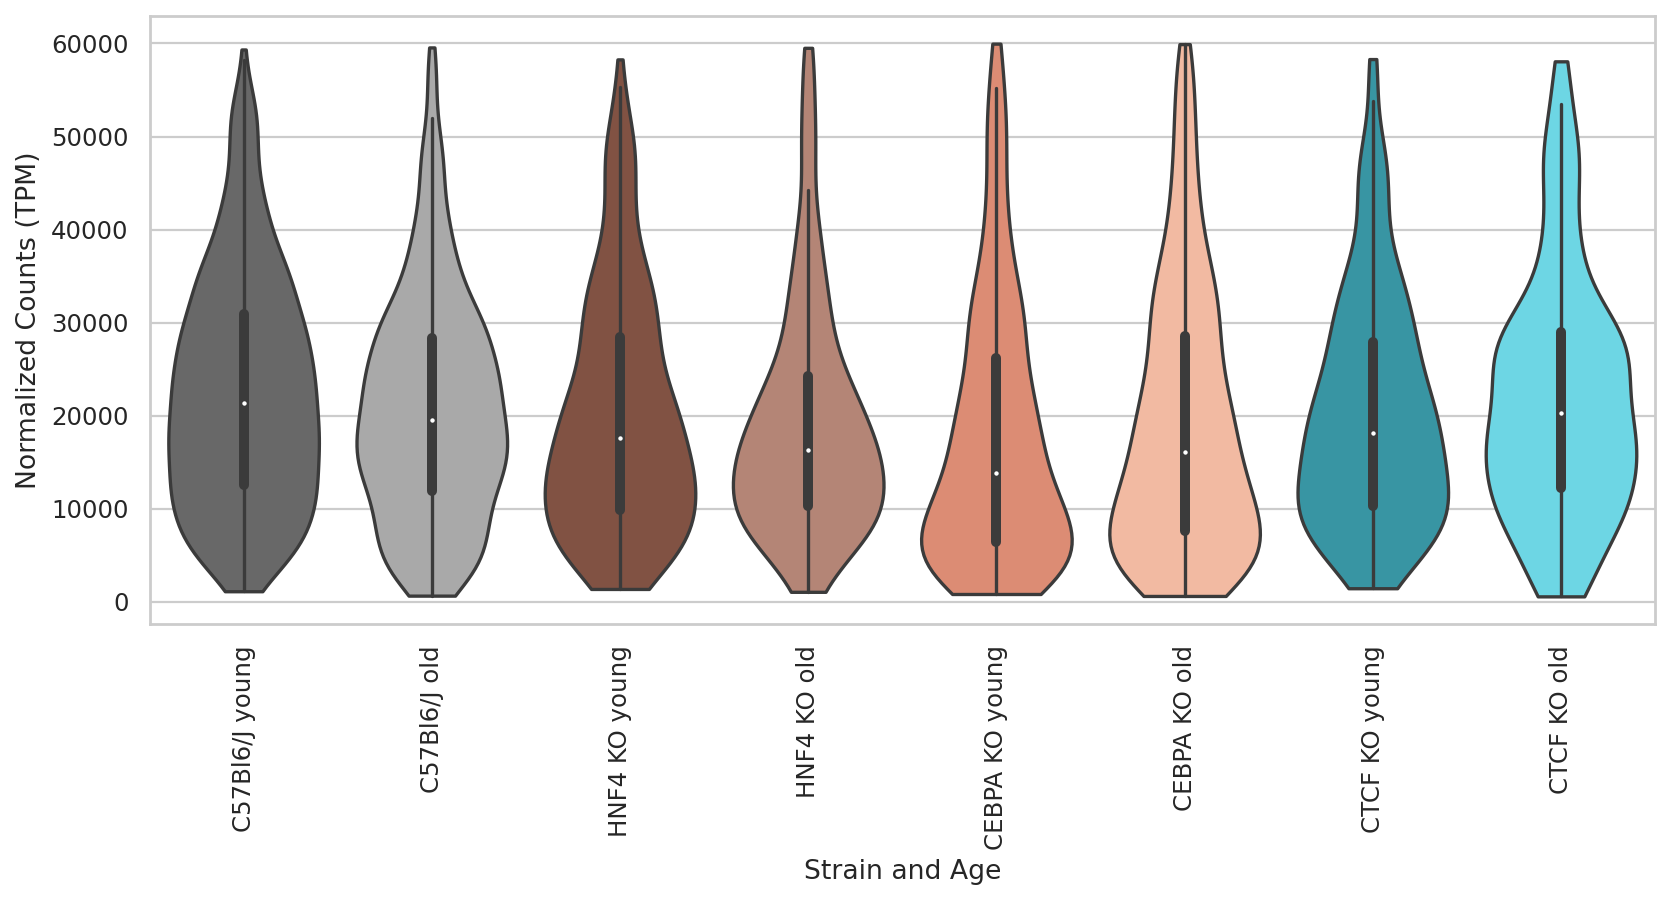

In [37]:
rcParams['figure.figsize']=(10,5)
sns.set_theme(style='whitegrid')
sc.pl.violin(adata, groupby = 'strain_age', keys = 'n_counts_TPM', 
             rotation = 90, stripplot=False,
             ylabel='Normalized Counts (TPM)',
             xlabel = 'Strain and Age',
             **{'inner': 'box'},
             save = f'_{today}_normalized_counts_TPM.pdf'
            )

/home/icb/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


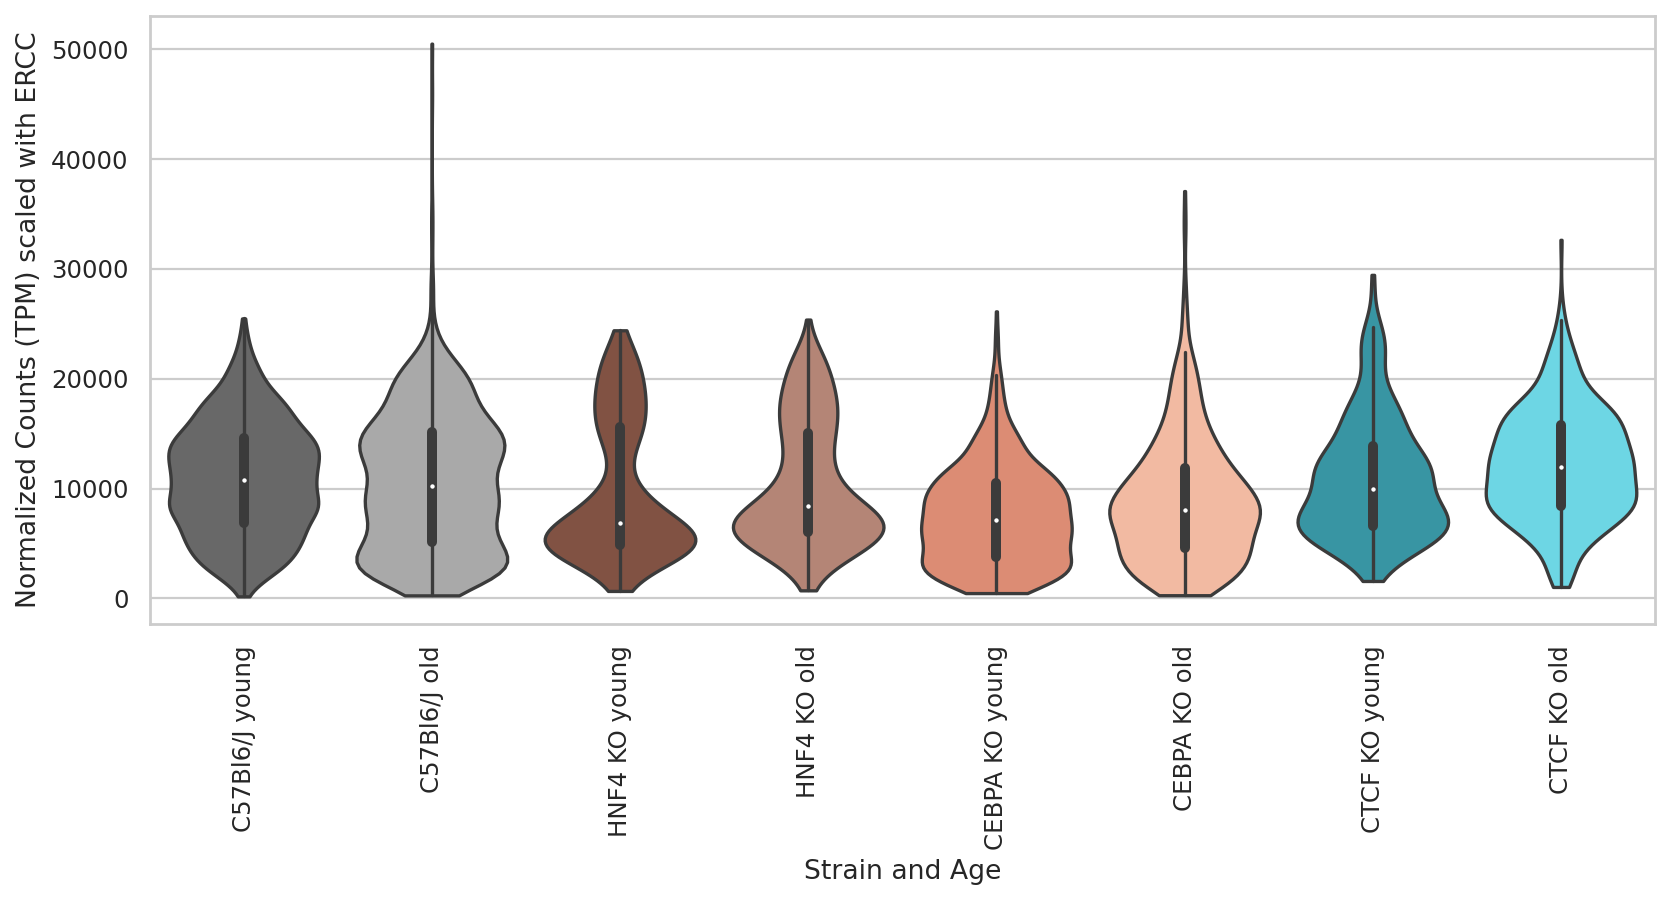

In [38]:
rcParams['figure.figsize']=(10,5)
sns.set_theme(style='whitegrid')
sc.pl.violin(adata, groupby = 'strain_age', keys = 'n_counts_TPM_norm', 
             rotation = 90, stripplot=False,
             ylabel='Normalized Counts (TPM) scaled with ERCC',
             xlabel = 'Strain and Age',
             **{'inner': 'box'},
             save = f'_{today}_normalized_counts_TPM_with_ERCC_scaling.pdf'
            )

Plot the number of expressed genes.

/home/icb/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


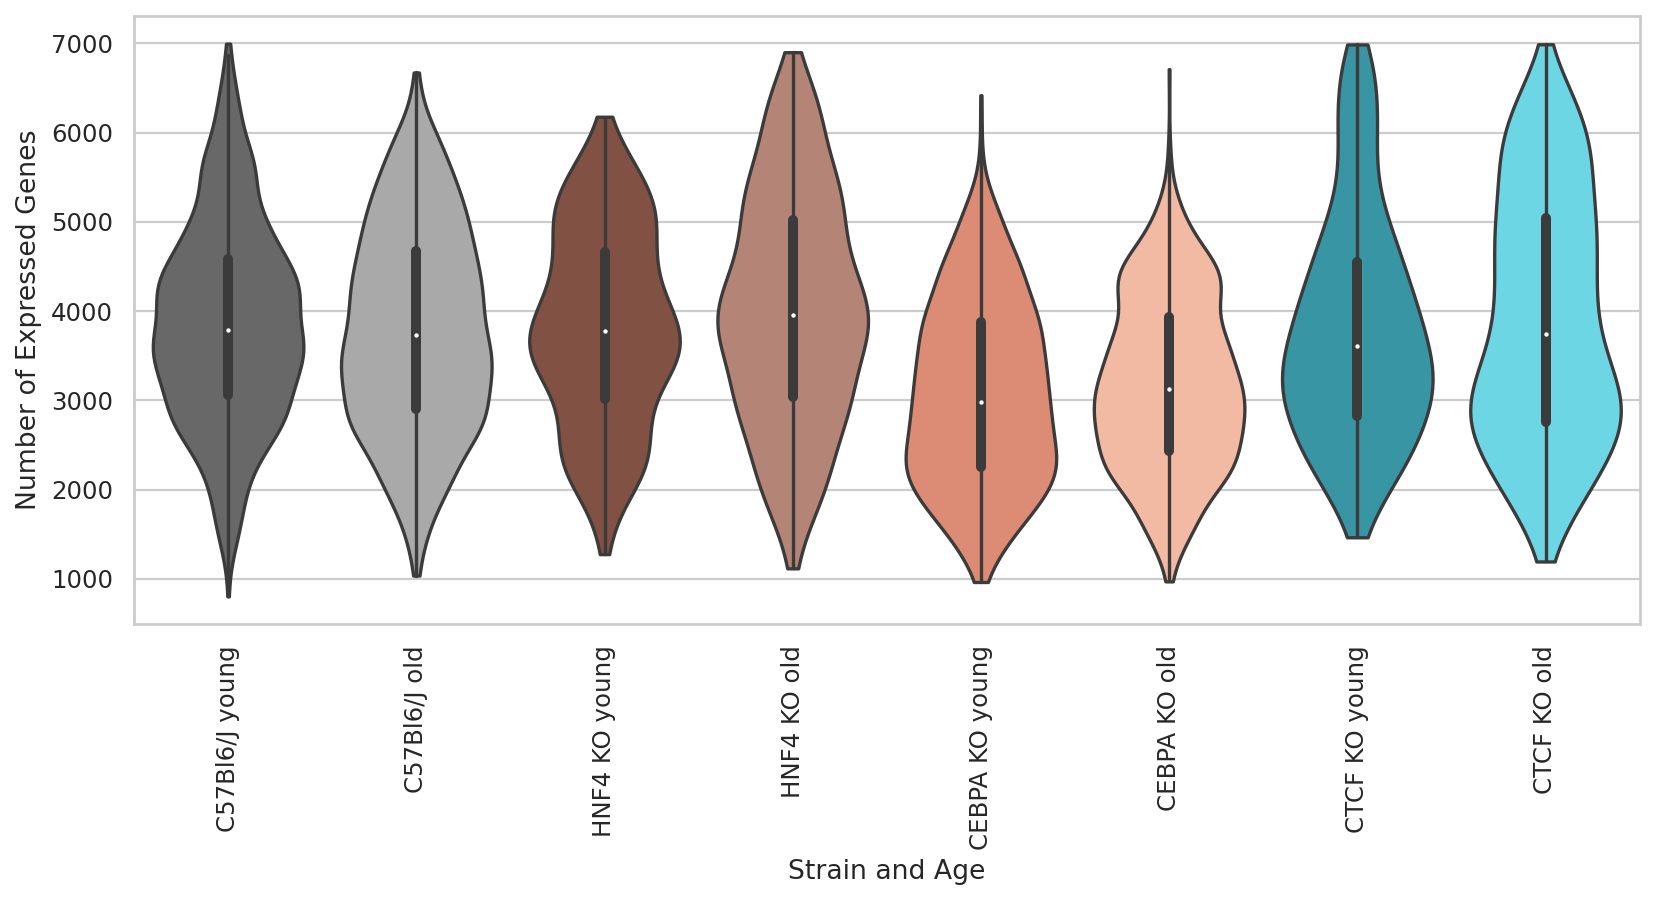

In [39]:
rcParams['figure.figsize']=(10,5)
sns.set_theme(style='whitegrid')
sc.pl.violin(adata, groupby = 'strain_age', keys = 'n_genes', 
             rotation = 90, stripplot=False,
             ylabel='Number of Expressed Genes',
             xlabel = 'Strain and Age',
             **{'inner': 'box'},
             save = f'_{today}_n_genes.pdf'
            )